# Accessing data with CliMetLab

Here are a few examples on how to get data into python using CliMetLab.

More examples can be found in the CliMetLab documentation (https://climetlab.readthedocs.io/en/latest/examples.html).

## How to run this exercise

This exercise is in the form of a [Jupyter notebook](https://jupyter.org/). It can be "run" in a number of free cloud based environments (see two options below). These require no installation. When you click on one of the links below ([`Open in Colab`](https://colab.research.google.com/github/ecmwf-projects/mooc-machine-learning-weather-climate/blob/main/tier_2/data_handling/01-accessing-data.ipynb) or [`Launch in Deepnote`](https://deepnote.com/launch?url=https://github.com/ecmwf-projects/mooc-machine-learning-weather-climate/blob/main/tier_2/data_handling/01-accessing-data.ipynb)) you will be prompted to create a free account, after which you will see the same page you see here. You can run each block of code by selecting shift+control repeatedly, or by selecting the "play" icon. 

Advanced users may wish to run this exercise on their own computers by first installing [Python](https://www.python.org/downloads/), [Jupyter](https://jupyter.org/install) and [CliMetLab](https://climetlab.readthedocs.io/en/latest/installing.html).

<style>
td, th {
   border: 1px solid white;
   border-collapse: collapse;
}
</style>
<table align="left">
  <tr>
    <th>Run the tutorial via free cloud platforms: </th>
    <th><a href="https://colab.research.google.com/github/ecmwf-projects/mooc-machine-learning-weather-climate/blob/main/tier_2/data_handling/01-accessing-data.ipynb">
        <img src = "https://colab.research.google.com/assets/colab-badge.svg" alt = "Colab"></th>
    <th><a href="https://deepnote.com/launch?url=https://github.com/ecmwf-projects/mooc-machine-learning-weather-climate/blob/main/tier_2/data_handling/01-accessing-data.ipynb">
        <img src = "https://deepnote.com/buttons/launch-in-deepnote-small.svg" alt = "Kaggle"></th>
  </tr>
</table>

## Loading various sources

Now let's begin exploring data with CliMetLab. We will start by loading various "sources". A source is "something providing data". It needs some parameters to define the actual location of the data. For instance, a source can be a URL, a remote or local server, a database, or a file, etc.

Below are a few examples of using ``cml.load_source()``.

Notice how: 
- The API to retrieve the data is similar.
- Credentials are requested if needed with appropriate help message, then saved locally.
- Data is provided as pandas.Dataframe or xarray.Dataset.

Let's download some files for the examples:

In [1]:
!test -f test.grib || wget https://github.com/ecmwf/climetlab/raw/main/docs/examples/test.grib
!test -f test.nc || wget https://github.com/ecmwf/climetlab/raw/main/docs/examples/test.nc
!test -f temp.bufr || wget http://download.ecmwf.int/test-data/metview/gallery/temp.bufr

## Install and import CliMetLab

In [2]:
!pip install climetlab

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import climetlab as cml

## Read data

How to read data from a GRIB file:

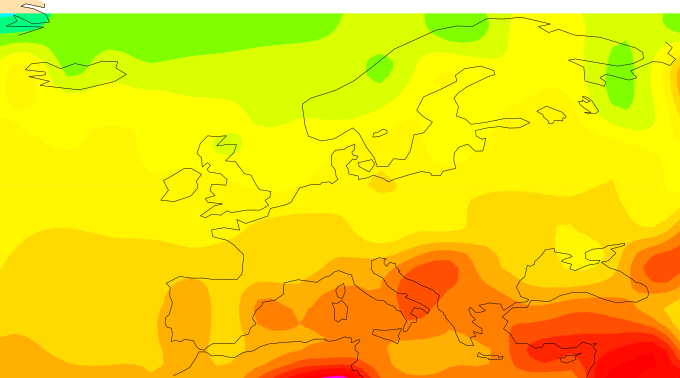

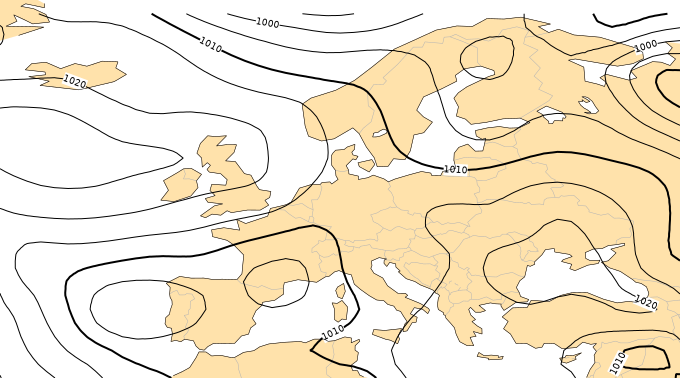

<xarray.Dataset>
Dimensions:     (number: 1, time: 1, step: 1, surface: 1, latitude: 11,
                 longitude: 19)
Coordinates:
  * number      (number) int64 0
  * time        (time) datetime64[ns] 2020-05-13T12:00:00
  * step        (step) timedelta64[ns] 00:00:00
  * surface     (surface) float64 0.0
  * latitude    (latitude) float64 73.0 69.0 65.0 61.0 ... 45.0 41.0 37.0 33.0
  * longitude   (longitude) float64 -27.0 -23.0 -19.0 -15.0 ... 37.0 41.0 45.0
    valid_time  (time, step) datetime64[ns] ...
Data variables:
    t2m         (number, time, step, surface, latitude, longitude) float32 ...
    msl         (number, time, step, surface, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2023-02-22T14:12 GRIB to CDM+CF via cfgrib-0.9.1...

In [4]:
ds = cml.load_source('file', 'test.grib')
for field in ds:
	cml.plot_map(field)
ds.to_xarray()

How to read data from a netCDF file:

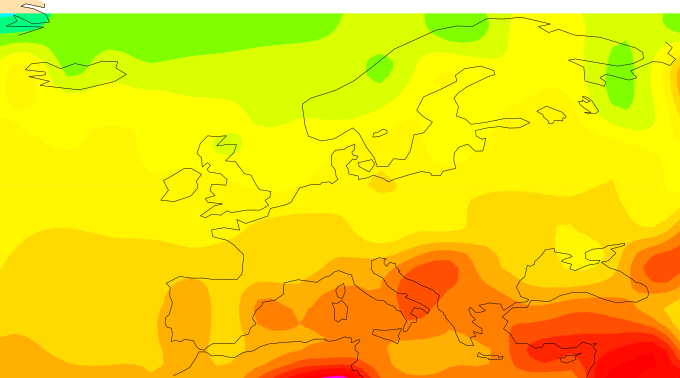

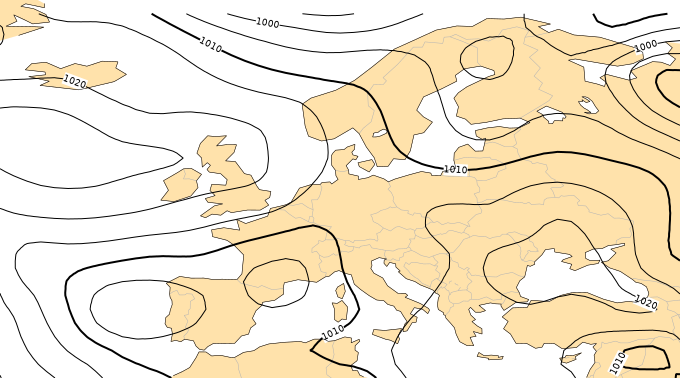

<xarray.Dataset>
Dimensions:     (longitude: 19, latitude: 11)
Coordinates:
  * longitude   (longitude) float64 -27.0 -23.0 -19.0 -15.0 ... 37.0 41.0 45.0
  * latitude    (latitude) float64 73.0 69.0 65.0 61.0 ... 45.0 41.0 37.0 33.0
    number      int32 ...
    time        datetime64[ns] ...
    step        timedelta64[ns] ...
    surface     int32 ...
    valid_time  datetime64[ns] ...
Data variables:
    t2m         (latitude, longitude) float32 dask.array<chunksize=(11, 19), meta=np.ndarray>
    msl         (latitude, longitude) float32 dask.array<chunksize=(11, 19), meta=np.ndarray>
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 GRIB to CDM+CF via cfgrib-0.9.5/ecCodes-2.17.0 w...

In [5]:
ds = cml.load_source('file', 'test.nc')
for field in ds:
	cml.plot_map(field)
ds.to_xarray()

How to read data from a BUFR file:

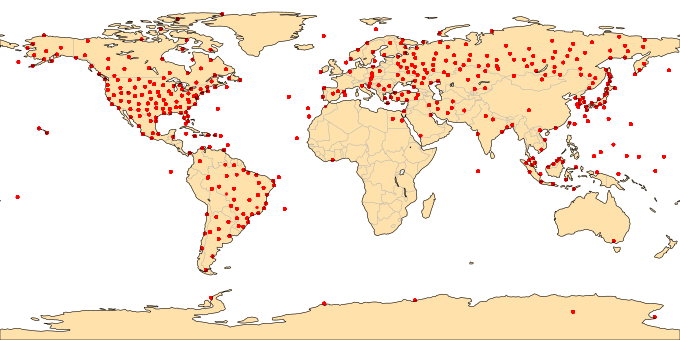

,stationNumber,latitude,longitude,pressure,airTemperature,data_datetime
0,907,58.47,-78.08,100300.0,258.3,2008-12-08 12:00:00
1,907,58.47,-78.08,100000.0,259.7,2008-12-08 12:00:00
2,907,58.47,-78.08,99800.0,261.1,2008-12-08 12:00:00
3,907,58.47,-78.08,99100.0,261.7,2008-12-08 12:00:00
4,907,58.47,-78.08,92500.0,258.1,2008-12-08 12:00:00
...,...,...,...,...,...,...
26000,968,25.03,121.52,10000.0,197.9,2008-12-08 12:00:00
26001,968,25.03,121.52,9520.0,196.3,2008-12-08 12:00:00
26002,968,25.03,121.52,7000.0,201.5,2008-12-08 12:00:00
26003,968,25.03,121.52,5000.0,209.1,2008-12-08 12:00:00


In [6]:
ds = cml.load_source('file', 'temp.bufr')
df = ds.to_pandas(
    columns=(
        "stationNumber",
        "latitude",
        "longitude",
        "data_datetime",
        "pressure",
        "airTemperature",
    ),
    filters={},
)
cml.plot_map(df, projection="global")
df

The purpose of the "file" source is to open **any** file, CliMetLab guesses what type of file is provided.

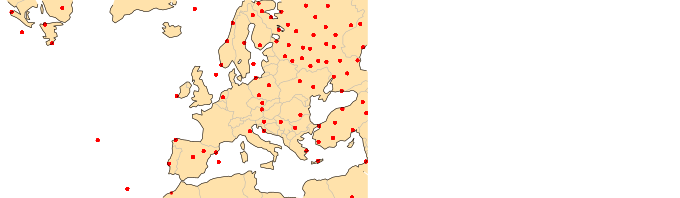

In [7]:
cml.plot_map(df, projection="europe")

## Reading from a URL `cml.load_source("url", URL)`

How to read data from a GRIB URL (using the climetlab source "url")

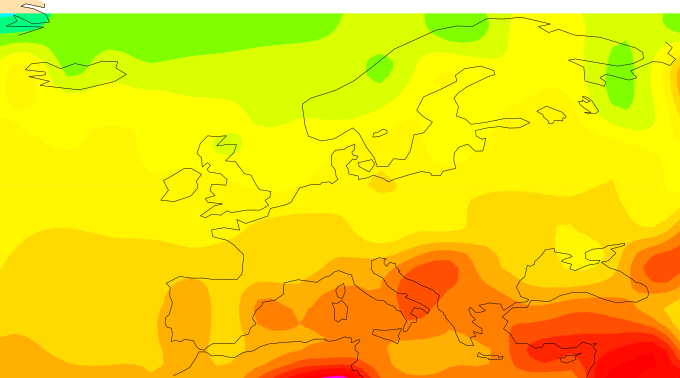

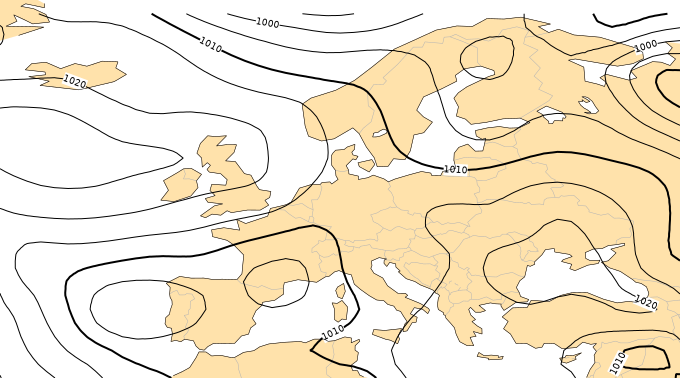

<xarray.Dataset>
Dimensions:     (number: 1, time: 1, step: 1, surface: 1, latitude: 11,
                 longitude: 19)
Coordinates:
  * number      (number) int64 0
  * time        (time) datetime64[ns] 2020-05-13T12:00:00
  * step        (step) timedelta64[ns] 00:00:00
  * surface     (surface) float64 0.0
  * latitude    (latitude) float64 73.0 69.0 65.0 61.0 ... 45.0 41.0 37.0 33.0
  * longitude   (longitude) float64 -27.0 -23.0 -19.0 -15.0 ... 37.0 41.0 45.0
    valid_time  (time, step) datetime64[ns] ...
Data variables:
    t2m         (number, time, step, surface, latitude, longitude) float32 ...
    msl         (number, time, step, surface, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2023-02-22T14:13 GRIB to CDM+CF via cfgrib-0.9.1...

In [8]:
ds = cml.load_source('url', 'https://github.com/ecmwf/climetlab/raw/main/docs/examples/test.grib')
for field in ds:
	cml.plot_map(field)
ds.to_xarray()

In [9]:
#cml.load_source('url', 'https://github.com/ecmwf/climetlab/raw/main/docs/examples/test.nc')
#cml.load_source('url', 'http://download.ecmwf.int/test-data/metview/gallery/temp.bufr')

In [10]:
# Downloading 32M of data.
URL = "https://www.ncei.noaa.gov/data/international-best-track-archive-for-climate-stewardship-ibtracs/v04r00/access/csv/ibtracs.SP.list.v04r00.csv"
data = cml.load_source("url", URL)
pd = data.to_pandas()

/usr/local/lib/python3.8/dist-packages/climetlab/sources/file.py:105: DtypeWarning: Columns (1,2,8,9,14,161,162) have mixed types.Specify dtype option on import or set low_memory=False.
  return self._reader.to_pandas(**kwargs)


In [11]:
pd.head()

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,...,BOM_GUST_PER,REUNION_GUST,REUNION_GUST_PER,USA_SEAHGT,USA_SEARAD_NE,USA_SEARAD_SE,USA_SEARAD_SW,USA_SEARAD_NW,STORM_SPEED,STORM_DIR
0,,Year,,,,,,,degrees_north,degrees_east,...,second,kts,second,ft,nmile,nmile,nmile,nmile,kts,degrees
1,1897005S10135,1897,1,SP,EA,NOT_NAMED,1897-01-04 12:00:00,NR,-10.1000,135.300,...,,,,,,,,,9,246
2,1897005S10135,1897,1,SI,WA,NOT_NAMED,1897-01-04 15:00:00,NR,-10.2755,134.902,...,,,,,,,,,8,246
3,1897005S10135,1897,1,SI,WA,NOT_NAMED,1897-01-04 18:00:00,NR,-10.4406,134.523,...,,,,,,,,,8,246
4,1897005S10135,1897,1,SI,WA,NOT_NAMED,1897-01-04 21:00:00,NR,-10.5853,134.182,...,,,,,,,,,7,247


In [12]:
pd['NAME'].unique()[:10]

array([' ', 'NOT_NAMED', 'AGNES', 'BERTHA', 'BEATRICE', 'CONNIE',
       'BARBARINE', 'CATHERINE', 'ISIS', 'ANNIE'], dtype=object)

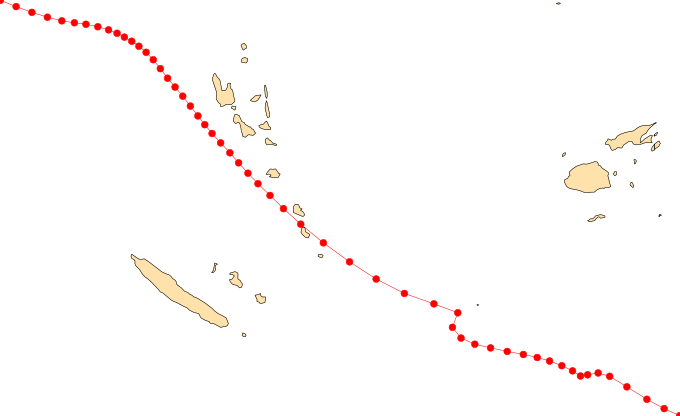

In [13]:
uma = pd[pd.NAME == "UMA:VELI"]
cml.plot_map(uma, style="cyclone-track")

As shown below, data can be read from different sources, the API is similar: "load_source" with keywords to specify the data requested.

<multiple>:   0%|          | 0.00/1.16M [00:00<?, ?B/s]

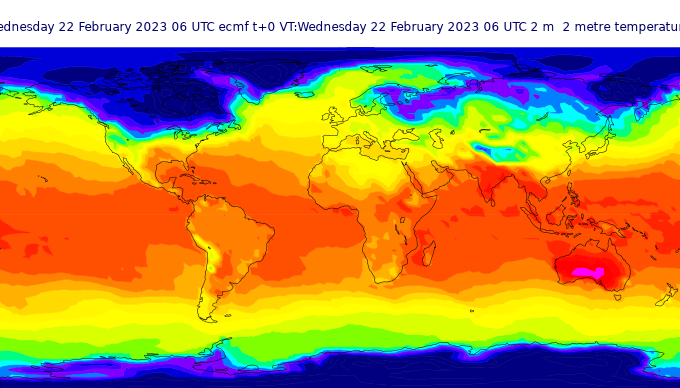

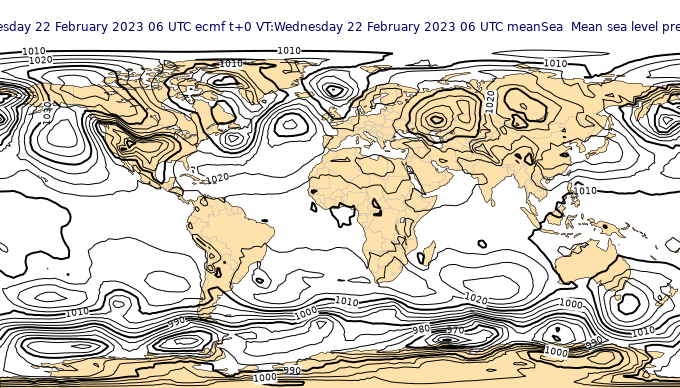

<xarray.Dataset>
Dimensions:            (time: 1, step: 1, heightAboveGround: 1, latitude: 451,
                        longitude: 900, meanSea: 1)
Coordinates:
  * time               (time) datetime64[ns] 2023-02-22T06:00:00
  * step               (step) timedelta64[ns] 00:00:00
  * heightAboveGround  (heightAboveGround) float64 2.0
  * latitude           (latitude) float64 90.0 89.6 89.2 ... -89.2 -89.6 -90.0
  * longitude          (longitude) float64 -180.0 -179.6 -179.2 ... 179.2 179.6
    valid_time         (time, step) datetime64[ns] ...
  * meanSea            (meanSea) float64 0.0
Data variables:
    t2m                (time, step, heightAboveGround, latitude, longitude) float32 ...
    msl                (time, step, meanSea, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2023-02-22T14:13 GRIB to CDM+CF via cfgrib-0.9.1...

In [14]:
source = cml.load_source(
    "ecmwf-open-data",
    param=["2t", "msl"],
)
for s in source:
    cml.plot_map(s, title=True)
source.to_xarray()

In order to run the following cell you need to register to the Climate Data Store (free) and enter your API key. When running the next cell, CliMetLab asks for two pieces of information: the API url (leave blank to use the default) and API key (here I needed to concatenate UID and APIKEY as UID:APIKEY). Below is an example of the prompt generated by CliMetLab to requests your input. You only have to enter them once.

**No registration to the CDS or MARS is required to follow the MOOC:** While interactive learning proved to be better than simply reading, you do not need to run the cells using the "cds" or "mars" to complete this MOOC.

<img src="screenshot-cds-api.png" alt="CDSAPI prompts" />

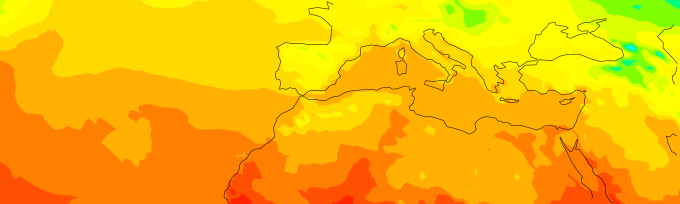

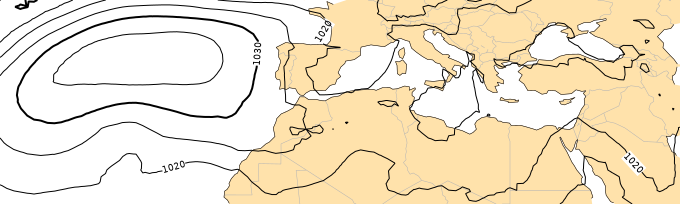

In [17]:
source = cml.load_source(
    "cds",
    "reanalysis-era5-single-levels",
    variable=["2t", "msl"],
    product_type="reanalysis",
    area=[50, -50, 20, 50],
    date="2011-12-02", # ["2011-12-02", "2011-12-03"] for several dates
    time="12:00",
)
for s in source:
    cml.plot_map(s)

In [18]:
source = cml.load_source(
    "mars",
    param=["2t", "msl"],
    levtype="sfc",
    area=[50, -50, 20, 50],
    grid=[1, 1],
    date="2011-12-02",
    
)
for s in source:
    cml.plot_map(s)
source.to_xarray()

KeyboardInterrupt: ignored

In [19]:
import climetlab as cml
source = cml.load_source(
    "mars",
    type="ofb",
    obsgroup="conv",
    time="12",
    format="odb",
    reportype=16001,
    date="2020-05-18",
)
pd = source.to_pandas()

KeyboardInterrupt: ignored

## Dataset

A dataset is a clearly identified set of data. It has a name, can be cited, has documentation and, hopefully, somebody is maintaining it.

A dataset is an object created using cml.load_dataset(name, arg1, arg2=..., ...)

- The name is a string that uniquely identifies the dataset.
- The argument(s) arg1 and keyword argument(s) arg2 can be used to specify a subset of the dataset.
- The data can be accessed using methods such as to_xarray() or to_pandas() or other.
- Relevant metadata are attached directly to the dataset to provide additional information such as a URL, a citation, licence, etc.

### Example dataset: hurricane database

In [20]:
atlantic = cml.load_dataset("hurricane-database", bassin="atlantic")
df = atlantic.to_pandas()

In [21]:
df.head()

,bassin,number,year,name,time,type,status,lat,lon,knots,category,pressure
0,AL,1,1851,unnamed,1851-06-25 00:00:00,,HU,28.0,-94.8,80.0,1,NaN
1,AL,1,1851,unnamed,1851-06-25 06:00:00,,HU,28.0,-95.4,80.0,1,NaN
2,AL,1,1851,unnamed,1851-06-25 12:00:00,,HU,28.0,-96.0,80.0,1,NaN
3,AL,1,1851,unnamed,1851-06-25 18:00:00,,HU,28.1,-96.5,80.0,1,NaN
4,AL,1,1851,unnamed,1851-06-25 21:00:00,L,HU,28.2,-96.8,80.0,1,NaN


In [22]:
df['name'].unique()[:10]

array(['unnamed', 'able', 'baker', 'charlie', 'dog', 'easy', 'fox',
       'george', 'how', 'item'], dtype=object)

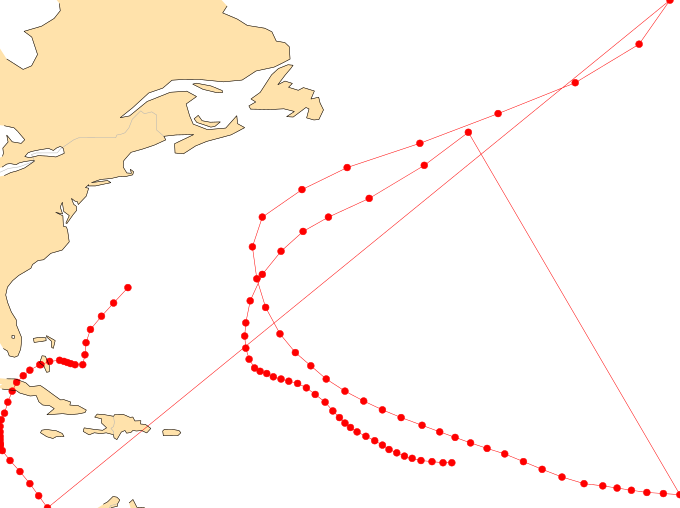

In [23]:
cml.plot_map(df[df['name']=='fox'], style="cyclone-track")

### Example dataset: part of ERA5 

In [24]:
import climetlab as cml
ds = cml.load_dataset("era5-temperature", 
#    period=(1979, 1999), # This can be long to run.
    period=(1979, 1981),
    domain="France",
    time=12,
 )

In [25]:
ds.to_xarray()

<xarray.Dataset>
Dimensions:     (number: 1, time: 1096, step: 1, surface: 1, latitude: 63,
                 longitude: 63)
Coordinates:
  * number      (number) int64 0
  * time        (time) datetime64[ns] 1979-01-01T12:00:00 ... 1981-12-31T12:0...
  * step        (step) timedelta64[ns] 00:00:00
  * surface     (surface) float64 0.0
  * latitude    (latitude) float64 54.5 54.25 54.0 53.75 ... 39.5 39.25 39.0
  * longitude   (longitude) float64 -6.0 -5.75 -5.5 -5.25 ... 8.75 9.0 9.25 9.5
    valid_time  (time, step) datetime64[ns] ...
Data variables:
    t2m         (number, time, step, surface, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2023-02-22T14:19 GRIB to CDM+CF via cfgrib-0.9.1...

Once the data has been downloaded, it is cached locally. The following will not download any additional data.


In [26]:
import climetlab as cml
ds = cml.load_dataset("era5-temperature", 
    period=1980,
    domain="France",
    time=12,
 )

If the dataset is not found, CliMetLab provides the list of available datasets:

In [27]:
import climetlab as cml
cml.load_dataset('hurican-database-with-typo') # Asking for an unknown dataset with a typo
# For Github actions: skip

hurican-database-with-typo.yaml: 0.00B [00:00, ?B/s]

NameError: ignored


Additional datasets are defined with python plugins (via pip install), more details on this process in the "Dataset plugins" notebook.

More  examples can be found at (https://climetlab.readthedocs.io/en/latest/examples.html).

## Exercises
Find the mean temperature (2m temperature) in Italy in 1980, at 6am.


**Solutions:**

In [29]:
import climetlab as cml
data = cml.load_dataset("era5-temperature", 
    period=1980,
    domain="Italy",
    time=6,
)


In [30]:
ds = data.to_xarray()
ds

<xarray.Dataset>
Dimensions:     (number: 1, time: 366, step: 1, surface: 1, latitude: 63,
                 longitude: 63)
Coordinates:
  * number      (number) int64 0
  * time        (time) datetime64[ns] 1980-01-01T06:00:00 ... 1980-12-31T06:0...
  * step        (step) timedelta64[ns] 00:00:00
  * surface     (surface) float64 0.0
  * latitude    (latitude) float64 50.5 50.25 50.0 49.75 ... 35.5 35.25 35.0
  * longitude   (longitude) float64 5.0 5.25 5.5 5.75 ... 19.75 20.0 20.25 20.5
    valid_time  (time, step) datetime64[ns] ...
Data variables:
    t2m         (number, time, step, surface, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2023-02-22T14:21 GRIB to CDM+CF via cfgrib-0.9.1...

In [34]:
print("mean temperature (2m temperature) in Italy in 1980, at 6am = ", float(ds.mean().t2m), "K")

mean temperature (2m temperature) in Italy in 1980, at 6am =  284.1121520996094 K


In [35]:
float(ds.t2m.mean())

284.1121520996094